In [63]:
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np

# Ejercicio 2 - Cadenas de Markov

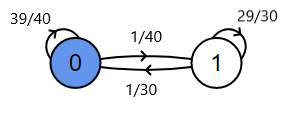

In [64]:
Image("markov_chain.png")

**Estado 0**: no se procesan solicitudes

**Estado 1**: se procesa una solicitud

## Punto a)

In [65]:
# La matriz de transicion es de 2x2 ya que tenemos unicamente dos estados. En el la posicion 1 - 1 va la probabilidad
# de pasar del estado 0 al mismo estado. En 1 - 2 la probabilidad de pasar del estado 0 al estado 1.
# Lo mismo va para la segunda fila, pero en funcion del estado 1.

matriz_transicion = np.array([[39/40, 1/40], [1/30, 29/30]])

## Punto b)

In [66]:
# Constantes
SEGUNDOS = 1000
INTERVALO = 0.01
ESTADOS = ['0', '1']

# n el numero de intervalos de tiempo. 1000 s / 0.01 s = 100000 intervalos
n = int(SEGUNDOS / INTERVALO)

# La distribucion de probabilidades acumuladas facilita la simulacion.
acumulada = np.array([[0.975, 1], [1/30, 1]])

In [67]:
resultado_estados = np.zeros(n)

# Estado (inicial) del sistema
estado = np.array([1, 0])

for i in range(n):
    d = estado.dot(acumulada)
    rand = np.random.rand()
    
    # Determinar a que estado cambia, y guardar el resultado.
    j = 0
    while (rand > d[j]):
        j = j + 1
    resultado_estados[i] = j
    
    # Cambiar el estado de la maquina para el siguiente intervalo.
    estado = np.array([0,0])
    estado[j] = 1

## Punto c)

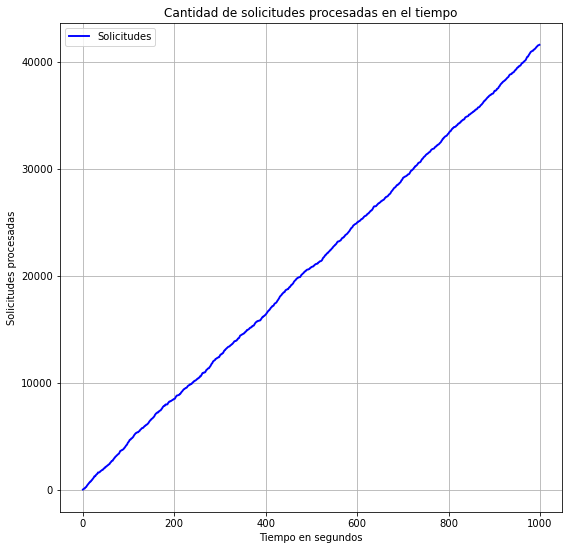

In [68]:
# collections.Counter cuenta los diferentes valores dentro de un arreglo y los guarda en diccionario.
resultados_categorizados = collections.Counter(resultado_estados)
solicitudes_cada_100 = [] # 100 veces 10 milisegundos es 1 segundo, asi puedo graficar en funcion de de 1000 segundos

for i in range(len(resultado_estados)):
    if i != 0:
        resultado_estados[i] = resultado_estados[i] + resultado_estados[i-1] # Resultados acumulados.
    if i % 100 == 0:
        solicitudes_cada_100.append(resultado_estados[i])
        
plt.subplots(figsize = (9,9))
plt.title('Cantidad de solicitudes procesadas en el tiempo')
p = plt.plot(range(len(solicitudes)), solicitudes_cada_100, color = 'blue', linewidth = 1.9, label = "Solicitudes")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Solicitudes procesadas")
plt.legend()
plt.grid()
plt.show()

## Punto d)

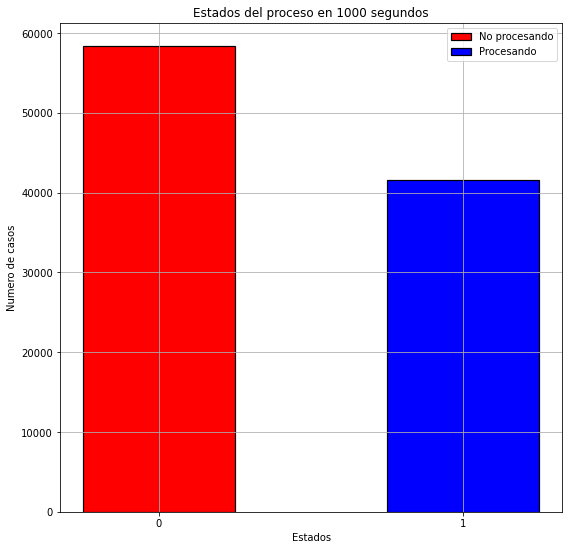

In [69]:
plt.subplots(figsize=(9,9))
plt.title('Estados del proceso en 1000 segundos')
p = plt.bar(ESTADOS, resultados_categorizados.values(), width = 0.5, color = ['red', 'blue'], linewidth = 1.2, edgecolor = 'black')
plt.ylabel('Numero de casos')
plt.xlabel('Estados')
plt.legend((p[0], p[1]), ('No procesando', 'Procesando'))
plt.grid()
plt.show()

## Punto e)

In [71]:
# Siendo n el numero de intervalos de tiempo, 
intervalos_sin_procesar = resultados_categorizados[0]
tiempo_sin_procesar = intervalos_sin_procesar/n
print("El porcentaje de tiempo sin procesar solicitudes es: {} %".format(tiempo_sin_procesar * 100))

El porcentaje de tiempo sin procesar solicitudes es: 58.396 %
